<a href="https://colab.research.google.com/github/VALDE021/Prediction-of-Product-Sales/blob/main/Phase2_Prediction_of_Product_Sales_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**<u>Phase - 2 Prediction of Product Sales</u>**</center>

- **Authored by:** Eric N Valdez
- **Date:** August 25, 2023

# **<u>Project Overview</u>**

# <u>Instructions:</u>
- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
- Identify the features **(X)** and target **(y):** Assign the ***`"Item_Outlet_Sales"`*** column as your target and the rest of the relevant variables as your features matrix.
- **Hint:** We **recommend you drop** the `"Item_Identifier"` feature because it has very high cardinality.
- Perform a train test split
- Create a preprocessing object to prepare the dataset for Machine Learning
- Make sure your imputation of missing values occurs <u>after</u> the train test split using SimpleImputer.

# <u>Data Dictionary

- **Item_Identifier**
  - Unique product ID
- **Item_Weight**
  - Weight of product
- **Item_Fat_Content**
   - Whether the product is low-fat or regular
- **Item_Visibility**
  - The percentage of total display area of all products in a store allocated to the particular product
- **Item_Type**
  - The category to which the product belongs
- **Item_MRP**
  - Maximum Retail Price (list price) of the product
- **Outlet_Identifier**
  - Unique store ID
- **Outlet_Establishment_Year**
  - The year in which store was established
- **Outlet_Size**
  - The size of the store in terms of ground area covered
- **Outlet_Location_Type**
  - The type of area in which the store is located
- **Outlet_Type**
  - Whether the outlet is a grocery store or some sort of supermarket
- **Item_Outlet_Sales**
  - Sales of the product in the particular store.
  - This is the target variable to be predicted.


# <u>Imports

In [1]:
# Seaborn
import seaborn as sns

# Matplotlib.pyplot
import matplotlib.pyplot as plt

# Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Numpy
import numpy as np

## Pandas
import pandas as pd

## Warnings
import warnings

# Model Validation Train Test Spit
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector

# Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

# Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set the default transformation output to Pandas
from sklearn import set_config

from IPython.core.display import clear_output

# Set global scikit-learn configuration
from sklearn import set_config

# Warnings
import warnings

#  SK Learn Display
from sklearn import set_config

#### **Warnings**

In [2]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')


#### **Pandas Display Configurations**

In [3]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

#### **SK Learn Display Configuration**

In [4]:
# Sklearn Display
set_config(display ='diagram')
set_config(transform_output='pandas')

# <u>Custom Functions:

In [5]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

In [6]:
# Custom function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


# <u>Load Data

In [7]:
# Load in the data
df = pd.read_csv('/content/drive/MyDrive/#Data Science -C.D./CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv')

# <u>Inspect Data

## `.shape`

In [8]:
df.shape

(8523, 12)

## `.info()`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## `.head()`

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## `.dtypes`

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## `.describe()`

In [12]:
# Rounded to 2 decimals
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# <u> Exploratory Data Analysis

In [13]:
# Make a copy of original df to avoid any manipulations
eda_ml = df.copy()

## `Drop Duplicates`

In [14]:
# Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.
## (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [15]:
eda_ml.duplicated().sum()

0

- There are no duplicates
- redropping Item_Identifier did not drop the 1st or second attempt from system


In [16]:
# Removinf the item
eda_ml = eda_ml.drop('Item_Identifier', axis=1)

## `Inconsistant Values`

In [17]:
# Define a variable and show inconsitant categories
string_cols = eda_ml.select_dtypes("object").columns
string_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
# Creating a for loop to print the output for every string column
for cols in string_cols:
  print(f'Value Counts for {cols}')
  print(eda_ml[cols].value_counts())

Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Value Counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype:

- Item_Fat_Content has inconsistent values

In [19]:
#Viewing the Item_Fat_Content Value Counts
eda_ml['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
# Creating a data dictionary to replace the inconsistent values in our Item Fat Content Column
eda_ml['Item_Fat_Content'] = eda_ml['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat','reg':'Regular'})

In [21]:
# Viewing results
eda_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
# Creating a data dictionary to replace inconistent values in our Outlet Sales column
eda_ml['Outlet_Size'] = eda_ml['Outlet_Size'].replace({'High':"Large"})

In [23]:
# Viewing resutls
eda_ml['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Medium
1       Medium
2       Medium
3          NaN
4        Large
5       Medium
6        Large
7       Medium
8          NaN
9          NaN
10      Medium
11       Small
12      Medium
13       Small
14       Large
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20       Large
21      Medium
22       Small
23       Small
24       Small
25         NaN
26       Small
27       Large
28         NaN
29       Small
30         NaN
31      Medium
32      Medium
33         NaN
34       Small
35      Medium
36      Medium
37      Medium
38      Medium
39      Medium
40       Small
41       Large
42      Medium
43      Medium
44       Large
45         NaN
46         NaN
47         NaN
48       Small
49       Small
50       Small
51       Large
52       Large
53         NaN
54         NaN
55      Medium
56         NaN
57      Medium
58       Small
59       Small
60      Medium
61         NaN
62      Medium
63       Sm

In [24]:
# Confirming value inconsistency correction
for cols in string_cols:
  print(f'Value Counts for {cols}')
  print(eda_ml[cols].value_counts())
  print("")

Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Value Counts for Outlet_Size
Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

Value Counts for Outlet_Location_Type

In [25]:
# Present the statistical summary of each of the numerical columns
eda_ml.describe().round

<bound method DataFrame.round of        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  >

## `Identifying the matrix features (X) and (y) target`

In [26]:
# Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target
## and the rest of the relevant variables as your features matrix.

In [27]:
# split X and y, we are predicting price
target = 'Item_Outlet_Sales'
X = eda_ml.drop(columns=[target]).copy()
y = eda_ml[target].copy()


In [28]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1


In [29]:
eda_ml.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


**Dropping Columns**

In [30]:
# Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.

In [31]:
df = df.drop('Item_Identifier', axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## `Train Test Split`

In [32]:
# split training and test

# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

In [33]:
# Performing a Train Test Split

In [34]:
X_train.shape

(5966, 10)

In [35]:
X_test.shape

(2557, 10)

In [36]:
y_train.shape

(5966,)

In [37]:
y_test.shape

(2557,)

In [38]:
X_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## **<u>`Preprocessing 'Object'`**

In [39]:
# Create a preprocessing object to prepare the dataset for Machine Learning

In [40]:
# Defining numeric_cols to represent the numeric features
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [41]:
# Defining ordinal_cols
ordinal_cols = ['Outlet_Size']
ordinal_cols

['Outlet_Size']

In [42]:
# Defining categorical_cols
# Dropping Item_Identifier & Outlet_size
categorical_cols = X_train.select_dtypes('object').drop(columns= 'Outlet_Size').columns
categorical_cols


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## `Impute the Numeric Columns`

In [43]:
# Instantiate and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [44]:
# Transforming the traning and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

In [45]:
# Confirming there are no more null values
X_train_num_imputed.isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
dtype: int64

## `Impute Categorical Columns`

In [46]:
# Instantiate and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [47]:
# Transform the training and test features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# Confriming there are no null values remaining
X_test_cat_imputed.isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

## `Impute Ordinal Columns`

In [48]:
# Instantaite and fit the imputer for ordinal features
impute_most_freq = SimpleImputer(strategy='most_frequent')
impute_most_freq.fit(X_train[ordinal_cols])

SimpleImputer(strategy='most_frequent')

In [49]:
# Transform the train and test categorical features and save as new vars
X_train_ord_imputed = impute_most_freq.transform(X_train[ordinal_cols])
X_test_ord_imputed = impute_most_freq.transform(X_test[ordinal_cols])

## `Encode the Categorical Data with OneHotEncoder`

In [50]:
# Instantiate and fit onehotencoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_cat_imputed)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [51]:
# Transforming the Categorical features and save
X_train_cat_encoded = encoder.transform(X_train_cat_imputed)
X_test_cat_encoded = encoder.transform(X_test_cat_imputed)
X_train_cat_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
# Comparing the shapes
print("X_train_cat_imputed: ", X_train_cat_imputed.shape)
print("X_test_cat_imputed: ", X_test_cat_imputed.shape)

X_train_cat_imputed:  (5966, 5)
X_test_cat_imputed:  (2557, 5)


## `Encode the Ordinal Data with OrdinalEncoder`

In [53]:
# Checking the unique categories in "shelf"
X_train_ord_imputed['Outlet_Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [54]:
# Creating a list with the order of categories
Outlet_Size_Order = ['Small', 'Medium', 'Large']

In [55]:
# Instantiate and fit an ordinalencoder
ord_encoder = OrdinalEncoder(categories= [Outlet_Size_Order])
ord_encoder.fit(X_train_ord_imputed)

OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])

In [56]:
# Transform the categorical features and save
X_train_ord_encoded = ord_encoder.transform(X_train_ord_imputed)
X_test_ord_encoded = ord_encoder.transform(X_test_ord_imputed)
X_test_ord_encoded.head()

,Outlet_Size
7503,2.0
2957,0.0
7031,1.0
1084,1.0
856,0.0


In [57]:
# Comparing the shapes
print("X_train_ord_imputed: ", X_train_ord_imputed.shape)
print("X_train_ord_encoded: ", X_train_ord_encoded.shape)

X_train_ord_imputed:  (5966, 1)
X_train_ord_encoded:  (5966, 1)


## `Scale Numeric Features`

In [58]:
# instantiate standard scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train_num_imputed)

StandardScaler()

In [59]:
# Apply the scaling transformation
X_train_num_scaled = scaler.transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)
X_train_num_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,-1.225867,1.606681,-0.401895,0.015833
655,1.627719,-1.008442,-0.619284,-0.103437
2229,-0.056443,-0.227068,-0.202535,-1.534680
2537,1.532837,1.028038,1.290187,0.492914
3528,1.295631,0.515355,0.686853,-1.296139


In [60]:
# Checking .describe() for imputed
X_train_num_imputed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5966.00,5966.00,5966.00,5966.00
mean,12.89,0.07,141.81,1997.87
std,4.22,0.05,62.63,8.39
min,4.56,0.00,31.29,1985.00
25%,9.50,0.03,94.14,1987.00
50%,12.65,0.05,143.88,1999.00
75%,16.10,0.09,186.62,2004.00
max,21.35,0.33,266.89,2009.00


In [61]:
# check describe() for pre-scaling data
X_train_num_scaled.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5966.00,5966.00,5966.00,5966.00
mean,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.98,-1.29,-1.76,-1.53
25%,-0.80,-0.76,-0.76,-1.30
50%,-0.06,-0.23,0.03,0.14
75%,0.76,0.56,0.72,0.73
max,2.01,5.14,2.00,1.33


## `Scale Ordinal Features`

In [62]:
# instantiate standard scaler and fit on training data
scaler_ord = StandardScaler()
scaler_ord.fit(X_train_ord_encoded)

StandardScaler()

In [63]:
# Apply the scaling transformation
X_train_ord_scaled = scaler_ord.transform(X_train_ord_encoded)
X_test_ord_scaled = scaler_ord.transform(X_test_ord_encoded)
X_train_ord_scaled.head()

,Outlet_Size
1921,0.284752
655,-1.384039
2229,0.284752
2537,0.284752
3528,1.953543


In [64]:
# check describe() for pre-scaling data
X_train_ord_scaled.describe().round(2)

,Outlet_Size
count,5966.00
mean,0.00
std,1.00
min,-1.38
25%,-1.38
50%,0.28
75%,0.28
max,1.95


In [65]:
# checking .describe() for ord_encoded
X_train_ord_encoded.describe().round(2)

,Outlet_Size
count,5966.00
mean,0.83
std,0.60
min,0.00
25%,0.00
50%,1.00
75%,1.00
max,2.00


# **<u>Bringing it all together**

In [66]:
# concatenate final training data
X_train_processed = pd.concat([X_train_num_scaled,X_train_ord_scaled,
                        X_train_cat_encoded], axis=1)
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,-1.225867,1.606681,-0.401895,0.015833,0.284752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,1.627719,-1.008442,-0.619284,-0.103437,-1.384039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,-0.056443,-0.227068,-0.202535,-1.534680,0.284752,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,1.532837,1.028038,1.290187,0.492914,0.284752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,1.295631,0.515355,0.686853,-1.296139,1.953543,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [67]:
X_train_processed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.0,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.07,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.28,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.12,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.76,-1.53,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,-1.30,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,0.14,0.28,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,0.28,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.14,2.00,1.33,1.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [68]:
# concatenate final test data
X_test_processed = pd.concat([X_train_num_scaled,X_train_ord_scaled,
                        X_train_cat_encoded], axis=1)
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,-1.225867,1.606681,-0.401895,0.015833,0.284752,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,1.627719,-1.008442,-0.619284,-0.103437,-1.384039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,-0.056443,-0.227068,-0.202535,-1.534680,0.284752,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,1.532837,1.028038,1.290187,0.492914,0.284752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,1.295631,0.515355,0.686853,-1.296139,1.953543,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [69]:
X_test_processed.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.0,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00,5966.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.07,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.28,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.12,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.76,-1.53,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,-1.30,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,0.14,0.28,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,0.28,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.14,2.00,1.33,1.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# *`Features:`*

- Ordinal: Outlet_Size
- Categorical: Outlet_Establishment, Item_ Weight, Item_Visability, Item_MRP.
- The remaining features are Categorical (Nominal).

## **`Create Pipelines and Define Tuples`**

### *1. <u>Numeric*

In [70]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline

# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


### *2. <u>Ordinal</u>*

- Make sure the list of columns for the tuple is in the same order as the list of category lists for the OrdinalEncoder!

In [71]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA

# Save list of number column names
ord_cols = ['Outlet_Size']

# Ordered Category Lists
Outlet_Sizelist =  ['Small', 'Medium', 'Large']

# Transformers

ord = OrdinalEncoder(categories=[Outlet_Sizelist])
freq_imputer = SimpleImputer(strategy='most_frequent')

# you might have 100 diff cat for ordinal so its getting out of range so good to scale
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ord_tuple = ('ordinal',ord_pipeline, ord_cols)

### *3. <u>Categorical*

In [72]:
# Preparing the categorical pipeline
cat_cols = X_train.select_dtypes('object').drop(columns= ord_cols).columns

impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

# Creating a categorical tuple for the Column Transfer
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

## **`Instantiate the ColumnTransformer`**

In [73]:
# Instantiate the make column transformer
col_transformer = ColumnTransformer([numeric_tuple,ord_tuple,ohe_tuple],
                                    remainder='drop', verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

## **`Fit the Transformer on Training Data Only`**

In [74]:
# Set the default transformation output to Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [75]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

## **`Transform Training and Test data`**

In [76]:
# Transform the training data
##X_train_processed = col_transformer.transform(X_train)

# Transform the testing data
##X_test_processed = col_transformer.transform(X_test)

# Veiwing the processed training data
##X_train_processed.head()

In [77]:
# Displaying the first 5 rows of the X_test
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,14.300,Low Fat,0.026300,Frozen Foods,79.4302,OUT013,1987,Large,Tier 3,Supermarket Type1
2957,7.930,Low Fat,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1
7031,14.500,Regular,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1084,NaN,Regular,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3
856,10.195,Regular,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1


# <u>Checking Cleaned Data</u>
- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

## `Finding Missing Values`

In [78]:
eda_ml.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Outlet Size and Item Weight still show errors but everything else is cleaned up

# <u>**`Extra Transformer and Base Model`**

### **ColumnTransformer**


In [79]:
ColumnTransformer,
## Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([numeric_tuple,
                                  ohe_tuple],
                                  remainder='drop',
                                  verbose_feature_names_out=False)

In [80]:
# Fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [81]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

#### **Confirm Preprocessing**

In [82]:
# Display the first (5) rows of the dataframe
display(X_train_processed.head())

# Check the shape
print(f'\nshape of processed data is: {X_train_processed.shape}')

# Check for remaining missing values
print(f'\nThere are {X_train_processed.isna().sum().sum()} missing values')

# Check the data types
print(f'\nThe datatypes are {X_train_processed.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1921,-1.237957,1.606681,-0.401895,0.015833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
655,1.616571,-1.008442,-0.619284,-0.103437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2229,0.000000,-0.227068,-0.202535,-1.534680,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2537,1.521657,1.028038,1.290187,0.492914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3528,1.284373,0.515355,0.686853,-1.296139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0



shape of processed data is: (5966, 39)

There are 0 missing values

The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_

### **Baseline Model**



In [83]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
## Model predictions
train_preds = dummy_pipe.predict(X_train)
test_preds = dummy_pipe.predict(X_test)

## Inspect predictions
train_preds[:5]

array([2204.88251968, 2204.88251968, 2204.88251968, 2204.88251968,
       2204.88251968])

In [86]:
## Training Metrics
print(f'MAE Train {mean_absolute_error(y_train, train_preds)}')
print(f'RMSE Train {np.sqrt(mean_squared_error(y_train, train_preds))}')
print(f'R2 Train {r2_score(y_train, train_preds)}')

print()
## Testing Metrics
print(f'MAE test {mean_absolute_error(y_test, test_preds)}')
print(f'RMSE test {np.sqrt(mean_squared_error(y_test, test_preds))}')
print(f'R2 test {r2_score(y_test, test_preds)}')

MAE Train 1356.0956685589554
RMSE Train 1719.7193453989066
R2 Train 0.0

MAE test 1338.3443921634669
RMSE test 1675.4635583171257
R2 test -0.002208005062074303


In [87]:
## Display model performance metrics using a function
dummy_metrics = evaluate_regression(dummy_pipe, X_train, y_train, X_test, y_test,
                                    verbose=True, output_frame=True)

dummy_metrics

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 1,356.096
- MSE = 2,957,434.627
- RMSE = 1,719.719
- R^2 = 0.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 1,338.344
- MSE = 2,807,178.135
- RMSE = 1,675.464
- R^2 = -0.002


,MAE,MSE,RMSE,R^2
Training Data,1356.096,2957434.627,1719.719,0.000
Test Data,1338.344,2807178.135,1675.464,-0.002


# **<u>CRISP-DM Phase 4 - Modeling**

## `1. Your first task is to build a linear regression model to predict sales.`
- ### Build a linear Regression Model
- ### Use the custom evaluation function to get the metrics for your model (on training and test data).
- ### Compare the training vs. test R-squared values and answer the question: to ***`what extent is this model overfit/underfit?`***

## <u>Linear Regression Model

In [88]:
## Create an instance of the model
lin_reg = LinearRegression()
## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)


## Fit the model
lin_reg_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [89]:
lin_reg_metrics = evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.664
- MSE = 1,298,673.683
- RMSE = 1,139.594
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 810.410
- MSE = 1,210,346.223
- RMSE = 1,100.157
- R^2 = 0.568


The linear regression model appears to be underfit as it doesn't account for a high percentage of the variance in either set.

## `2. Your second task is to build a Random Forest model to predict sales.`
- ### Build a default Random Forest model.
- ### Use the custom evaluation function to get the metrics for your model (on training and test data).
- ### Compare the training vs. test R-squared values and answer the question: to ***`what extent is this model overfit/underfit?`***
- ### Compare this model's performance to the linear regression model: **`which model has the best test scores?`**

## <u>Random Forest Model

In [90]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state=42)

In [91]:
# Model pipeline
rf_pipe = make_pipeline(col_transformer, rf)

In [92]:
# fit pipeline on training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [93]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.836
- MSE = 182,909.354
- RMSE = 427.679
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 776.805
- MSE = 1,245,831.112
- RMSE = 1,116.168
- R^2 = 0.555


### Linear Regression appears to do much better on `training data` but the scores are actually very similar on `test` as the lin_reg model was underfit, but compared to this model you see it now as *`overfit`* and the **`RandomForest was underfit.`**

## `3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.`
- ### After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set ***`(no folds).`***
- ### Compare your tuned model to your default Random Forest: ***`did the performance improve?`***

## <u>GridSearchCV for tuning

In [94]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                     StandardScaler())]),
                           

In [95]:
# define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],}

In [96]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs = -1, cv = 3, verbose = 1)

In [97]:
# Fitting gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [98]:
# Obtaining best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

In [99]:
# define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 655.524
- MSE = 873,254.081
- RMSE = 934.481
- R^2 = 0.705

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 742.918
- MSE = 1,134,795.979
- RMSE = 1,065.268
- R^2 = 0.595


In [100]:
# custom function to compare vs tuned model
lin_reg_metrics = evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test, verbose = True,)
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.664
- MSE = 1,298,673.683
- RMSE = 1,139.594
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 810.410
- MSE = 1,210,346.223
- RMSE = 1,100.157
- R^2 = 0.568
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.836
- MSE = 182,909.354
- RMSE = 427.679
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 776.805
- MSE = 1,245,831.112
- RMSE = 1,116.168
- R^2 = 0.555


# <u>**CRISP-DM Phase 5 - `Evaluation`**

##*` 4. You now have tried several different models on your data set. You need to determine which model to implement.`*

- ### Overall, which model do you recommend?
- ### Justify your recommendation.
- ### In a Markdown **cell:**
  - #### Interpret your model's performance based on **R-squared** in a way that your non-technical stakeholder can understand.
  - #### <u>Select</u> another ***regression*** metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
  - #### Include why you selected this metric to explain to your stakeholder.
  - #### Compare the training vs. test scores and answer the question: to **`what extent is this model overfit/underfit?`**

- ### The tuned model was better balanced with slightly better scores on test data on everything from `MAE` to $R^2$.
- ### The tuned model isn't a massive improvement over baseline but it is the best model now.

# **<u>Overall**

- ### The $R^2$ score on the tuned `RandomForest` model was the highest of all the models suggesting that it can account for the highest percentage of variance. Guessing the average would result in a $R^2$ of 0.1 is the highest mark and would suggest ***100%*** hit rate on predictions. The tuned `RandomForest model` sits at .5, meaning that, while not perfect, it can predict outcomes at a fairly high level.

- ### The **RMSE** is significantly lower on this model as well, meaning the avegage error was smaller and there were much fewer outliers.

- ### The tuned **RandomForest** (RF) model has the lowest average error and thus could provide value as a predictive algorithm in this case as the **<u>'misses'</u>** are typically fairly close to the <u>target</u>.

- ### As illustrated by the converging $R^2$ scores on the tuned model, the original **RF** model was very overfit with significantly higher $R^2$ scores on <u>training</u> vs <u>test</u>. Those numbers converged on the `tuned model` resulting in 0.7 and 0.5 $R^2$'s respectively.

# <center><u>Project 1 - Part 8 (Core)

# **`Task:`**
* For this assignment, you will revisit your models to predict supermarket sales. You will apply what you've learned this week to explain how your models made their predictions. Then you will update your README with these insights.

### **`Extra Imports`**

In [120]:
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

### **`Functionized Code From Part 1`**

In [144]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True):
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

    else:
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

def plot_coefficients(coeffs, sort_values=True, top_n=None, figsize=(6,10),
                     title="Linear Regression Coefficients", xlabel='Coefficient'):
    """Plots a Series of coefficients as horizotal bar chart, with option to sort
    and to only keep top_n coefficients"""

    if top_n is not None:
        top_n = coeffs.abs().rank().sort_values(ascending=False).head(top_n)
        coeffs = coeffs.loc[top_n.index]

    if sort_values:
        coeffs = coeffs.sort_values()



    ax = coeffs.plot(kind='barh', figsize=figsize)
    ax.axvline(0, color='k')
    ax.set(xlabel=xlabel, title=title);
    plt.show()
    return ax


def get_importances(rf_reg):
    importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
    return importances


def plot_importances(importances, sort_values=True, top_n=None, figsize=(6,4),
                     title="Feature Importance", xlabel='Importance'):
    if sort_values:
        importances = importances.sort_values()

    if top_n is not None:
        importances = importances.tail(top_n)


    ax = importances.plot(kind='barh', figsize=figsize)
    ax.axvline(0, color='k')
    ax.set(xlabel=xlabel, title=title);
    plt.show()
    return ax

### **ColumnTransformer**


In [101]:
# Transform the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

## <u>Linear Regression:</u>
* Extract and visualize the coefficients that your model determined.
  * Select the top 3 most impactful features and interpret their coefficients in plain English.
* Save your figure as a .png file to upload to your README on GitHub  (you will need this for the final piece of this assignment - Update Your README).

### **Linear Regression Model**

In [ ]:
# Create an instance of the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_proc, y_train)

In [103]:
# Display the Model's metrics
evaluate_regression(lin_reg, X_train_proc, y_train,
                    X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.664
- MSE = 1,298,673.683
- RMSE = 1,139.594
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 810.410
- MSE = 1,210,346.223
- RMSE = 1,100.157
- R^2 = 0.568


#### **Extracting and Visualizing Coefficients**

#### **Extracting Coefficients from lin_reg**

In [104]:
# Display the model's coefficients
lin_reg.coef_

array([-6.76690112e+00, -2.63851954e+01,  9.90152521e+02, -4.53738581e+13,
       -7.61462459e+12, -7.61462459e+12,  3.08756657e+14,  3.08756657e+14,
        3.08756657e+14,  3.08756657e+14,  3.08756657e+14,  3.08756657e+14,
        3.08756657e+14,  3.08756657e+14,  3.08756657e+14,  3.08756657e+14,
        3.08756657e+14,  3.08756657e+14,  3.08756657e+14,  3.08756657e+14,
        3.08756657e+14,  3.08756657e+14,  1.17851686e+15,  3.68876990e+14,
        1.10231212e+14,  1.10303350e+14,  3.52836302e+14, -1.83741806e+13,
        9.39959570e+13,  8.31724538e+13, -3.32333284e+14, -3.21509781e+14,
       -1.75877413e+14, -5.64324393e+14, -9.31205203e+14, -1.27004230e+15,
       -5.19931694e+14, -1.42299519e+14, -1.43504027e+14])

In [105]:
# Display the model's intercept
lin_reg.intercept_

722307030033167.2

In [106]:
# Saving the coefficients
coef_series = pd.Series(lin_reg.coef_, index=lin_reg.feature_names_in_)
coef_series

Item_Weight                       -6.766901e+00
Item_Visibility                   -2.638520e+01
Item_MRP                           9.901525e+02
Outlet_Establishment_Year         -4.537386e+13
Item_Fat_Content_Low Fat          -7.614625e+12
Item_Fat_Content_Regular          -7.614625e+12
Item_Type_Baking Goods             3.087567e+14
Item_Type_Breads                   3.087567e+14
Item_Type_Breakfast                3.087567e+14
Item_Type_Canned                   3.087567e+14
Item_Type_Dairy                    3.087567e+14
Item_Type_Frozen Foods             3.087567e+14
Item_Type_Fruits and Vegetables    3.087567e+14
Item_Type_Hard Drinks              3.087567e+14
Item_Type_Health and Hygiene       3.087567e+14
Item_Type_Household                3.087567e+14
Item_Type_Meat                     3.087567e+14
Item_Type_Others                   3.087567e+14
Item_Type_Seafood                  3.087567e+14
Item_Type_Snack Foods              3.087567e+14
Item_Type_Soft Drinks              3.087

In [107]:
# Add the Intercept
coef_series['intercept'] = lin_reg.intercept_
coef_series

Item_Weight                       -6.766901e+00
Item_Visibility                   -2.638520e+01
Item_MRP                           9.901525e+02
Outlet_Establishment_Year         -4.537386e+13
Item_Fat_Content_Low Fat          -7.614625e+12
Item_Fat_Content_Regular          -7.614625e+12
Item_Type_Baking Goods             3.087567e+14
Item_Type_Breads                   3.087567e+14
Item_Type_Breakfast                3.087567e+14
Item_Type_Canned                   3.087567e+14
Item_Type_Dairy                    3.087567e+14
Item_Type_Frozen Foods             3.087567e+14
Item_Type_Fruits and Vegetables    3.087567e+14
Item_Type_Hard Drinks              3.087567e+14
Item_Type_Health and Hygiene       3.087567e+14
Item_Type_Household                3.087567e+14
Item_Type_Meat                     3.087567e+14
Item_Type_Others                   3.087567e+14
Item_Type_Seafood                  3.087567e+14
Item_Type_Snack Foods              3.087567e+14
Item_Type_Soft Drinks              3.087

In [145]:
# formatting numbers to not use a , and to use thousands sep, and 4 digits floats
pd.set_option('display.float_format', lambda x: f"{x:,.4f}")

In [109]:
# show coefs again
coef_series

Item_Weight                                           -6.7669
Item_Visibility                                      -26.3852
Item_MRP                                             990.1525
Outlet_Establishment_Year            -45,373,858,133,141.6719
Item_Fat_Content_Low Fat              -7,614,624,586,219.8291
Item_Fat_Content_Regular              -7,614,624,586,143.7783
Item_Type_Baking Goods               308,756,656,546,871.8750
Item_Type_Breads                     308,756,656,546,857.0000
Item_Type_Breakfast                  308,756,656,546,901.5625
Item_Type_Canned                     308,756,656,546,899.8125
Item_Type_Dairy                      308,756,656,546,770.1250
Item_Type_Frozen Foods               308,756,656,546,845.8125
Item_Type_Fruits and Vegetables      308,756,656,546,917.6875
Item_Type_Hard Drinks                308,756,656,546,892.2500
Item_Type_Health and Hygiene         308,756,656,546,907.7500
Item_Type_Household                  308,756,656,546,889.1875
Item_Typ

#### **`get_coefficients` Function**

In [146]:
# Define a function to extract linear regression coefficients
def get_coefficients(lin_reg):
    coefs = pd.Series(lin_reg.coef_, index=lin_reg.feature_names_in_)
    coefs['intercept'] = lin_reg.intercept_
    return coefs

#### **Visualizing Coefficients**

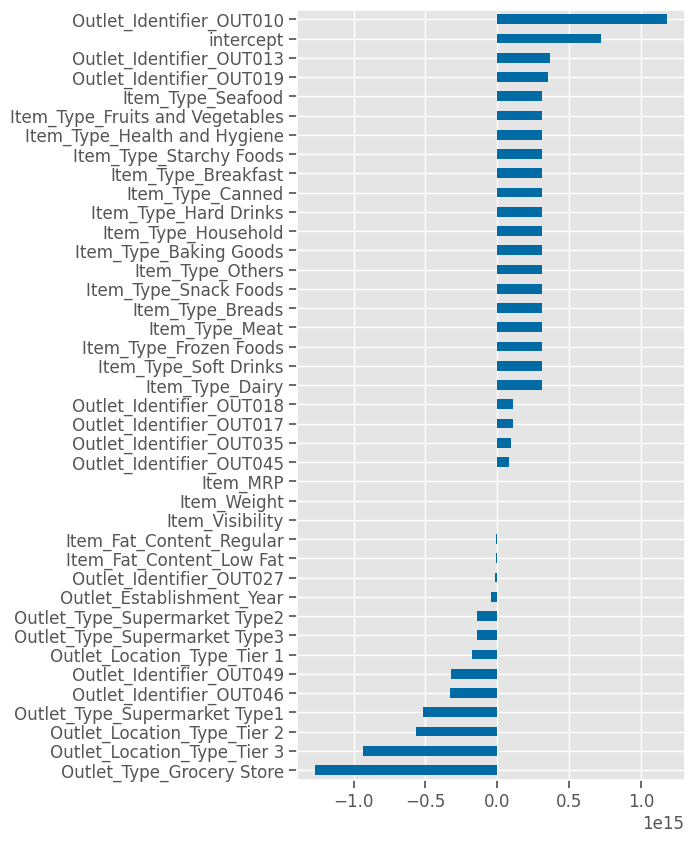

In [172]:
# Create a barplot of the coefficients
# sorted by values
# adding ax to have readable y-axis
ax = coef_series.sort_values().plot(kind='barh', figsize=(5,10))
coef_series.sort_values().plot(kind='barh');

##### **Drop the Intercept**



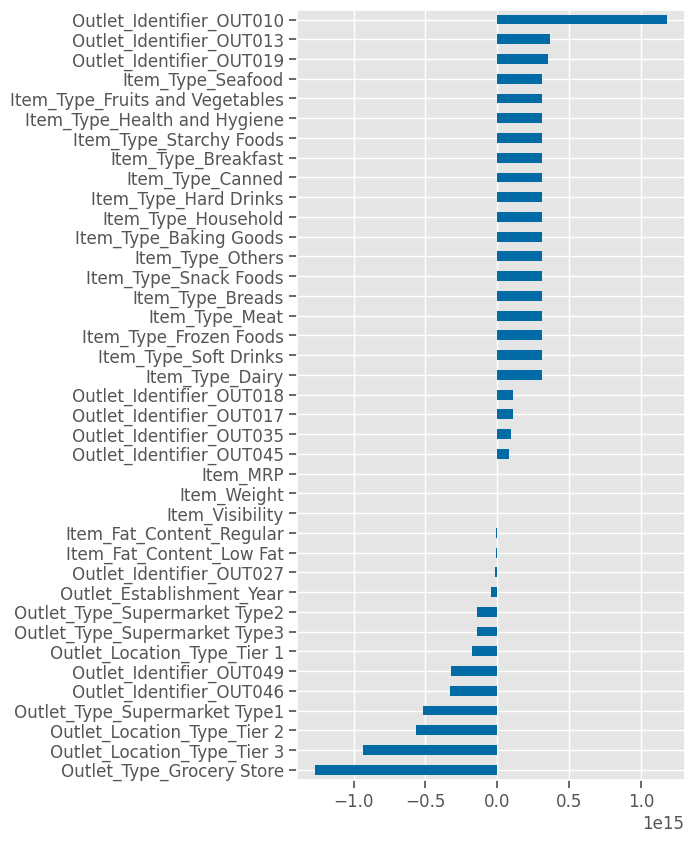

In [170]:
# Create a barplot of the coefficients
# sorted by values
# and drop the intercept
# adding ax to have readable y-axis
ax = coef_series.sort_values().plot(kind='barh', figsize=(5,10))
coef_series.drop('intercept').sort_values().plot(kind='barh');

In [149]:
# Define a function to plot coefficients
def plot_coefficients(coefs, drop_intercept=True):
    if drop_intercept:
        coefs = coefs.drop('intercept')
    ax = coefs.sort_values().plot(kind='barh', figsize=(5,13))
    ax.axvline(0, color='k')
    ax.set(xlabel='Prediction of Product Sales', title="Coefficients")
    plt.show();

#### **Understanding Coefficients**

In [140]:
# Display the coefficients series
# sorted by descending values
display(coef_series.sort_values(ascending=False))

Outlet_Identifier_OUT010           1,178,516,862,371,074.7500
intercept                            722,307,030,033,167.2500
Outlet_Identifier_OUT013             368,876,990,254,257.7500
Outlet_Identifier_OUT019             352,836,301,817,491.6250
Item_Type_Seafood                    308,756,656,547,228.1875
Item_Type_Fruits and Vegetables      308,756,656,546,917.6875
Item_Type_Health and Hygiene         308,756,656,546,907.7500
Item_Type_Starchy Foods              308,756,656,546,901.8750
Item_Type_Breakfast                  308,756,656,546,901.5625
Item_Type_Canned                     308,756,656,546,899.8125
Item_Type_Hard Drinks                308,756,656,546,892.2500
Item_Type_Household                  308,756,656,546,889.1875
Item_Type_Baking Goods               308,756,656,546,871.8750
Item_Type_Others                     308,756,656,546,868.6875
Item_Type_Snack Foods                308,756,656,546,861.5625
Item_Type_Breads                     308,756,656,546,857.0000
Item_Typ

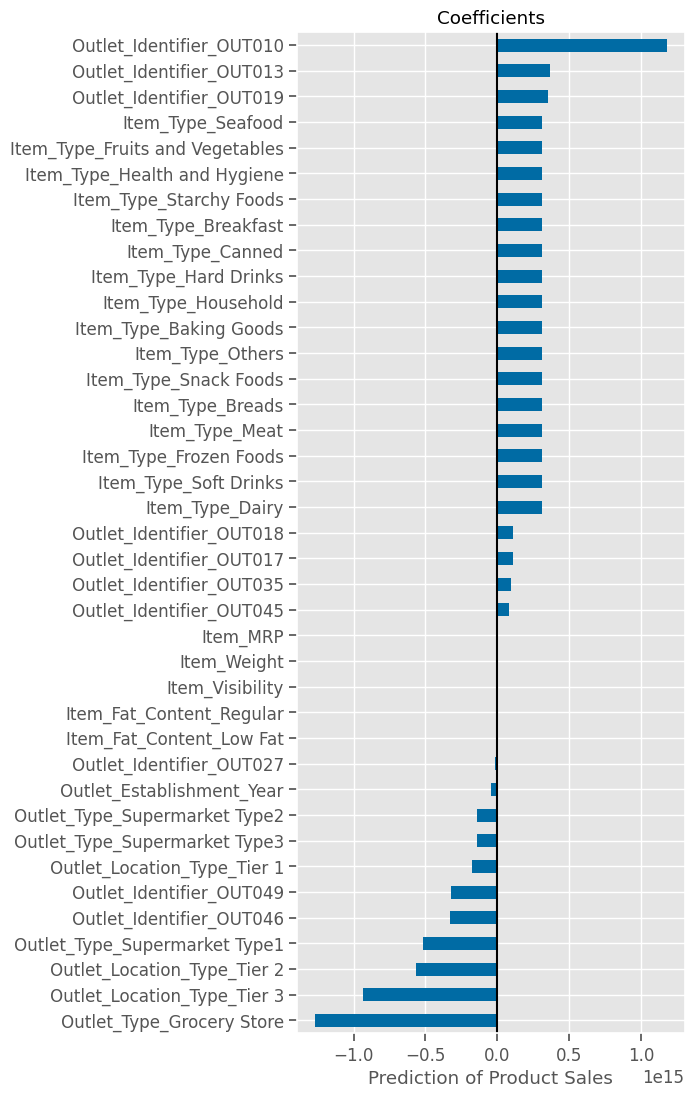

In [141]:
# Call the plot_coefficients function
plot_coefficients(coef_series)

### The top 3 most impactful features:


1.   Outlet_Identifier_OUT010
2.   Outlet_Identifier_OUT013
3.   Outlet_Identifier_OUT019


## <u>Tree-Based Model:</u>
* Extract and visualize the feature importances that your best model determined.
  * Identify the top 5 most important features.
* Save your figure as a .png file to upload to your README on GitHub (you will need this for the final piece of this assignment - Update Your README).

## **Random Forest Model**

In [151]:
## Create an instance of the model
rf_reg = RandomForestRegressor()

## Fit the model
rf_reg.fit(X_train_proc, y_train)

RandomForestRegressor()

In [117]:
## Display the Model's metrics
evaluate_regression(rf_reg, X_train_proc, y_train,
                    X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.244
- MSE = 180,819.078
- RMSE = 425.228
- R^2 = 0.939

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 776.200
- MSE = 1,249,888.187
- RMSE = 1,117.984
- R^2 = 0.554


#### **Feature Importances**

In [152]:
# Extract Feature Importances
importances = rf_reg.feature_importances_
importances

array([5.27484202e-02, 9.81770124e-02, 4.41341384e-01, 2.49329696e-02,
       5.16479731e-03, 5.33049671e-03, 4.14950021e-03, 2.37709858e-03,
       2.76052092e-03, 4.16838296e-03, 6.05361309e-03, 5.78950861e-03,
       7.78781206e-03, 3.20941306e-03, 4.12282991e-03, 6.55255436e-03,
       3.24319699e-03, 1.80473635e-03, 1.75678623e-03, 8.04078715e-03,
       5.89699920e-03, 3.55689433e-03, 1.88479429e-05, 2.47435396e-03,
       4.60675970e-03, 1.19874761e-03, 1.62499765e-05, 3.03440461e-02,
       5.66707532e-03, 4.84768929e-03, 4.73438214e-03, 4.81310911e-03,
       3.61795666e-03, 3.31773339e-03, 3.29259174e-03, 1.93938467e-01,
       1.66494021e-03, 1.40475711e-03, 3.50765781e-02])

In [153]:
# Define a function to extract importances from a model
def get_feature_importances(model):
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    return pd.Series(importances, index=feature_names)

In [154]:
# Define a series variable by
# calling the get_feature_importances function
# to obtain importances from a model
importances =  get_feature_importances(rf_reg)
importances

Item_Weight                       0.0527
Item_Visibility                   0.0982
Item_MRP                          0.4413
Outlet_Establishment_Year         0.0249
Item_Fat_Content_Low Fat          0.0052
Item_Fat_Content_Regular          0.0053
Item_Type_Baking Goods            0.0041
Item_Type_Breads                  0.0024
Item_Type_Breakfast               0.0028
Item_Type_Canned                  0.0042
Item_Type_Dairy                   0.0061
Item_Type_Frozen Foods            0.0058
Item_Type_Fruits and Vegetables   0.0078
Item_Type_Hard Drinks             0.0032
Item_Type_Health and Hygiene      0.0041
Item_Type_Household               0.0066
Item_Type_Meat                    0.0032
Item_Type_Others                  0.0018
Item_Type_Seafood                 0.0018
Item_Type_Snack Foods             0.0080
Item_Type_Soft Drinks             0.0059
Item_Type_Starchy Foods           0.0036
Outlet_Identifier_OUT010          0.0000
Outlet_Identifier_OUT013          0.0025
Outlet_Identifie

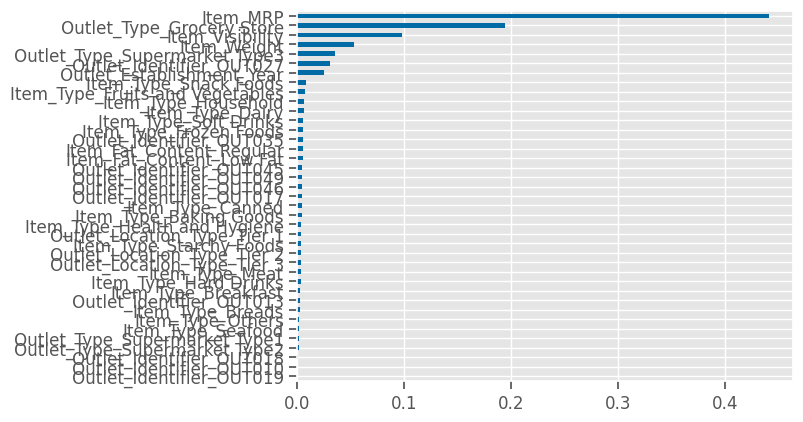

In [174]:
# Create a barplot of the importance series variable
# sorted by values
importances.sort_values().plot(kind='barh');

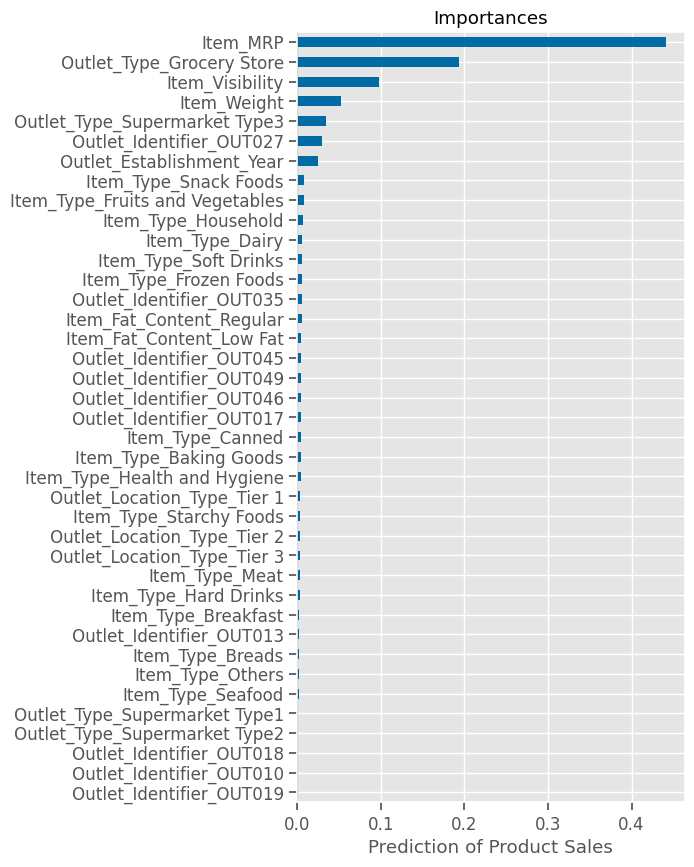

In [168]:
# Making graph more legible to read
ax = importances.sort_values().plot(kind='barh', figsize=(5,10))
ax.axvline(0, color='k')
ax.set(xlabel='Prediction of Product Sales', title="Importances")
plt.show();

### The top 5 that my RF Tree Model showed was is:


1.   Item_MRP
2.   Outlet_Type Grocery Store
3.   Item_Visibility
4.   Item_Weight
5.   Outlet_Type_Supermarket Type 3